# DSC540 Project 1

Shreyas Ravi

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [1]:
import sklearn
sklearn.__version__

'0.23.2'

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [ ]:
# Your package imports here

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### SHREYAS RAVI

**Honor Pledge:**  
I pledge on my honor that I, **Shreyas Ravi**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [3]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [5]:
df = pd.read_csv('WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Question 1 [5 points]
How many people have cancer?

> Hint: Should be less than 300!

In [27]:
# code here 
y.sum()

212

212 number of people have cancer.

### Question 2 [5 points]
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [28]:
# Code here
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [30]:
# categorical data
categorical_columns = [i for i in df.columns if df[i].dtype=="object"]
print(categorical_columns)
# no categorical columns 

[]


In [32]:
# na values
# df.isnull().values.any()
df.isna().sum()
# no na values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [25]:
# no of observations 
df.shape
# 569 records (observations) and 31 columns 

(569, 31)

In [26]:
# no of variables in X
X.shape
# 30 columns (variables) -> 1 columns dropped and used as 'Y'

(569, 30)

### Question 3 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [33]:
# Code here
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


When we look at the mean for the first 4 columns we can see a vast difference between those means and the ones following it. The values of the means depend on the variable at hand and since there are multiple independent variables, the differences between these variables fluctuate. For example - The mean of "mean area" is 654.889 which is much larger than the mean of "mean fractal dimension" which is at 0.062798. Considering the means have such large differences, it is safe to assume that all the other statistical descriptors would have similar differences between each variable. 

The largest value belongs to the "worst area" variable, which has a max value of 4254.00

The smallest values belong to multiple variables such as "mean concavity", "mean concave points" and a few more as they have min values at 0.00000. 

### Question 4 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [34]:
# Code here
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


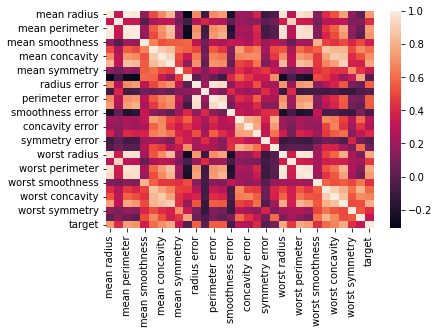

In [35]:
import seaborn as sns
sns.heatmap(df.corr());

The mean compactness and mean concavity have a relatively high correlation of 0.8831. Since this correlation is high and positive, we can say that they are directly and highly correlated. Furthermore we also have a very high positive correlation between worst radius and mean perimieter, with a correlation value of 0.969476. These two values can also be said to have a highly positive correlation between them. 

### Question 5 [5 points]
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [36]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [42]:
# Code here
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
Name: target, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

0    0.629371
1    0.370629
Name: target, dtype: float64

The classes of Y will have similar distribution in test and train sets, if it is stratified on Y. As we can see above, this is true, as the proportions of 1's and 0's in y_train is similar to the proportions of those in y_test. 

Stratified Sampling is a type of sampling where a main population is split into subpopulations and sampled independently. This would help get better insights from each substrata and provide better precision in the information gathered. 

### Question 6 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [49]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [50]:
pred = clf.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9413145539906104

In [51]:
pred = clf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.986013986013986

In [53]:
# Code here
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[89,  1],
       [ 1, 52]])

In [56]:
metrics.recall_score(y_test, pred)

0.9811320754716981

In [57]:
# specificity 
52/(52+1)

0.9811320754716981

In [55]:
import sklearn.metrics
metrics.precision_score(y_test, pred)

0.9811320754716981

In [58]:
# false positive
1/(1+52)

0.018867924528301886

In [59]:
# f1 score
metrics.f1_score(y_test, pred)

0.9811320754716981

### Question 7 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [66]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
knn_pred = knn.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = knn_pred)

1.0

In [87]:
knn_pred_test = knn.predict(X_test)
metrics.accuracy_score(y_true=y_test, y_pred=knn_pred_y)

0.9440559440559441

In [88]:
# confusion matrix 
confusion_matrix(y_test, knn_pred_test)

array([[86,  4],
       [ 4, 49]])

In [91]:
metrics.recall_score(y_test, knn_pred_test)

0.9245283018867925

In [90]:
# specificity 
49/(49+4)

0.9245283018867925

In [92]:
# precision
metrics.precision_score(y_test, knn_pred_test)

0.9245283018867925

In [93]:
# f1 score
metrics.f1_score(y_test, knn_pred_test)

0.9245283018867925

### Question 8 [10 points]

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [81]:
# Code here
from sklearn.naive_bayes import GaussianNB
n_bayes = GaussianNB()
n_bayes.fit(X_train, y_train)

GaussianNB()

In [83]:
nb_pred = n_bayes.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = nb_pred)

0.9366197183098591

In [84]:
nb_pred_test = n_bayes.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = nb_pred_test)

0.958041958041958

In [86]:
# confusion matrix 
confusion_matrix(y_test, nb_pred_test)

array([[89,  1],
       [ 5, 48]])

In [94]:
metrics.recall_score(y_test, nb_pred_test)

0.9056603773584906

In [95]:
# specificity 
48/(48+1)

0.9795918367346939

In [96]:
# precision
metrics.precision_score(y_test, nb_pred_test)

0.9795918367346939

In [97]:
# f1 score
metrics.f1_score(y_test, nb_pred_test)

0.9411764705882353

### Question 9 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [98]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # Code here
    clf.fit(X_train, y_train)
    log_pred_train = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = log_pred_train))
    log_pred_test = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=log_pred_test))

In [99]:
accuracy_train

[0.9248826291079812,
 0.931924882629108,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347,
 0.9413145539906104,
 0.9413145539906104,
 0.9460093896713615,
 0.9460093896713615,
 0.9507042253521126,
 0.9624413145539906,
 0.9694835680751174,
 0.9812206572769953,
 0.9859154929577465,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221,
 0.9906103286384976,
 0.9882629107981221]

In [100]:
accuracy_test

[0.9370629370629371,
 0.958041958041958,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.9790209790209791,
 0.9790209790209791,
 0.972027972027972,
 0.9790209790209791]

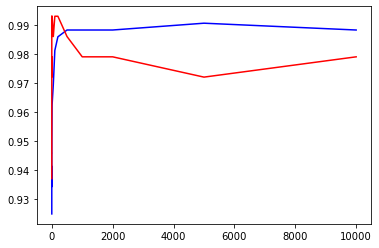

In [102]:
# Code here
import matplotlib.pyplot as plt 
plt.plot(C_list, accuracy_train,
     label = "Training Score", color = 'b')
plt.plot(C_list, accuracy_test,
     label = "Testing Score", color = 'r')


### Question 10 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [103]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    # Code here
    clf.fit(X_train, y_train)
    knn_train = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = knn_train))
    knn_test = clf.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=knn_test))

In [104]:
# accuracy_train
accuracy_train

[1.0,
 0.9483568075117371,
 0.9460093896713615,
 0.9389671361502347,
 0.931924882629108,
 0.9248826291079812,
 0.9272300469483568,
 0.9248826291079812,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056,
 0.9131455399061033,
 0.9084507042253521,
 0.9014084507042254]

In [105]:
# accuracy_test
accuracy_test

[0.9440559440559441,
 0.965034965034965,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9440559440559441,
 0.9370629370629371,
 0.9370629370629371,
 0.9370629370629371,
 0.9300699300699301,
 0.9230769230769231,
 0.9300699300699301,
 0.9090909090909091]

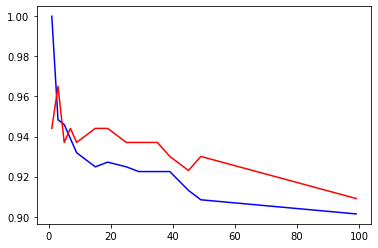

In [106]:
# Code here
import matplotlib.pyplot as plt 
plt.plot(K_list, accuracy_train,
     label = "Training Score", color = 'b')
plt.plot(K_list, accuracy_test,
     label = "Testing Score", color = 'r')

### Question 11 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [109]:
from sklearn import preprocessing

In [110]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [111]:
# Code here
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train_ss, y_train)
    log_pred_train = clf.predict(X_train_ss)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = log_pred_train))
    log_pred_test = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=log_pred_test))

In [112]:
accuracy_train

[0.6455399061032864,
 0.8356807511737089,
 0.8849765258215962,
 0.9460093896713615,
 0.9483568075117371,
 0.9788732394366197,
 0.9835680751173709,
 0.9906103286384976,
 0.9906103286384976,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9953051643192489,
 0.9976525821596244,
 0.9976525821596244,
 1.0,
 1.0,
 1.0]

In [113]:
accuracy_test

[0.6363636363636364,
 0.8671328671328671,
 0.9300699300699301,
 0.965034965034965,
 0.965034965034965,
 0.9790209790209791,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.9790209790209791,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965]

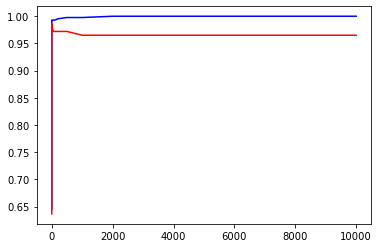

In [121]:
plt.plot(C_list, accuracy_train,
     label = "Training Score", color = 'b')
plt.plot(C_list, accuracy_test,
     label = "Testing Score", color = 'r')
# plt.axis([-10, 25, 0.60, 1.5])

0.01 would be the ideal value for 'C', since after this the test accuracy begins to fall. 

### Question 12 [5 points]

In [119]:
X_train_ss.shape

(426, 30)

In [120]:
X_train_ss[0:426,:].shape

(426, 30)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [ ]:
X_train_ss.shape

In [124]:
# Code here
accuracy_train = []
accuracy_test = []
for i in range(2, len(X_train_ss)):
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.01)
    xtrainss = X_train_ss[0:i,:]
    ytrainss = y_train[0:i]
    clf.fit(xtrainss, ytrainss)
    log_pred_train = clf.predict(xtrainss)
    accuracy_train.append(metrics.accuracy_score(y_true = ytrainss, y_pred = log_pred_train))
    log_pred_test = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=log_pred_test))

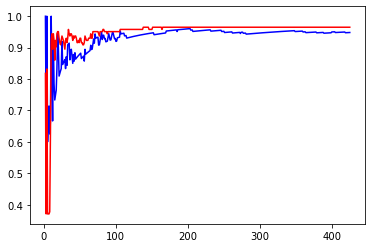

In [128]:
plt.plot(range(2, len(X_train_ss)), accuracy_train,
     label = "Training Score", color = 'b')
plt.plot(range(2, len(X_train_ss)), accuracy_test,
     label = "Testing Score", color = 'r')

In this case, as the number of observations increase, the training and testing accuracies also increase. We see that after 100 observations, the accuracy curves begin to flatten out, which means that increasing the observations after this amount would not make a massive difference in the accuracies of the training and testing sets. Any data above 100 would be ideal number of observations for training. 

### Question 13 [5 points]

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [133]:
# Code here
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train_ss = []
accuracy_test_ss = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_ss, y_train)
    knn_train_ss = clf.predict(X_train_ss)
    accuracy_train_ss.append(metrics.accuracy_score(y_true = y_train, y_pred = knn_train_ss))
    knn_test_ss = clf.predict(X_test_ss)
    accuracy_test_ss.append(metrics.accuracy_score(y_true=y_test, y_pred=knn_test_ss))

In [134]:
 accuracy_train_ss

[1.0,
 0.9835680751173709,
 0.9788732394366197,
 0.971830985915493,
 0.971830985915493,
 0.9577464788732394,
 0.960093896713615,
 0.9530516431924883,
 0.9483568075117371,
 0.9530516431924883,
 0.9530516431924883,
 0.9460093896713615,
 0.9483568075117371,
 0.9248826291079812]

In [135]:
 accuracy_test_ss

[0.951048951048951,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.951048951048951]

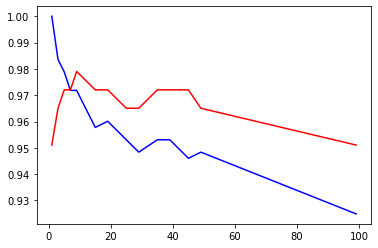

In [136]:
# Code here
plt.plot(K_list, accuracy_train,
     label = "Training Score", color = 'b')
plt.plot(K_list, accuracy_test,
     label = "Testing Score", color = 'r')

The ideal value of K from this graph would be 9, since it corresponds to the the highest accuracy for the testing set, at 0.97902 or 97.9% accuracy. 

### Question 14 [10 points]
- Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement one of the methods you proposed. 
    - Is the model accuracy increasing? Why do you think this might have helped?
    - If it not increasing, try the other method you proposed. Why do you think this might have helped?
    - If none of them did not improve, comment on why this might have been the case.
    - If you have time try a few more solutions and see which one works. 

In [140]:
# Code here
# trying elastic net instead of l2 (ridge regression)
# elastic net helps when there is potential overfitting with ridge regression
clf = LogisticRegression(max_iter = 10000, solver='saga', penalty='elasticnet', C=0.01, l1_ratio=0.5)
clf.fit(X_train, y_train)
log_pred_train = clf.predict(X_train)
accuracy_train = metrics.accuracy_score(y_true = y_train, y_pred = log_pred_train)
log_pred_test = clf.predict(X_test)
accuracy_test = metrics.accuracy_score(y_true=y_test, y_pred=log_pred_test)

In [141]:
accuracy_train

0.9248826291079812

In [142]:
accuracy_test

0.9230769230769231

Elastic Net Regression is a combination of L1 and L2 (ridge and lasso regression) and in this case, it has provided a lower accuracy for training (92.4%) and testing (92.3%) compared to the highest accuracy of the training and testing with ridge regression which sat at 99% for both of them. 

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [144]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train_mm, y_train)
knn_train_mm = clf.predict(X_train_mm)
accuracy_train_mm = metrics.accuracy_score(y_true = y_train, y_pred = knn_train_mm)
knn_test_mm = clf.predict(X_test_mm)
accuracy_test_mm = metrics.accuracy_score(y_true=y_test, y_pred=knn_test_mm)

In [145]:
accuracy_train_mm

0.9765258215962441

In [146]:
accuracy_test_mm

0.9790209790209791

For K=9 the accuracy between using minmax Scaler and using regular scaling has increased from 0.948 with regular scaling to 0.976 with minmax scaling for the training set and 0.965 to 0.979 for the testing set. This shows a clear increase in the accuracy of the model at K=9 while using minmax scaling. Standard scaling scales everything to a unit variance, essentially centering all values around the mean as opposed to minmax scaling which keeps the distance of the values intact. The separation with the minmax scaling is better compared to the standard scaling for KNN which is based on distance between neighbors. 